In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
plt.style.use('ggplot')

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.vector_ar.var_model import VAR

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [12]:
ls data/

sales_data.csv         store_item.csv         train.csv
sample_submission.csv  test.csv


In [23]:
store_item = pd.read_csv('data/store_item.csv')

In [25]:
store_item.head()

,date,1_1,1_2,1_3,1_4,1_5,1_6,1_7,1_8,1_9,...,10_41,10_42,10_43,10_44,10_45,10_46,10_47,10_48,10_49,10_50
0,2013-01-01,13,33,15,10,11,31,25,33,18,...,12,20,24,17,45,37,11,25,17,33
1,2013-01-02,11,43,30,11,6,36,23,37,23,...,10,22,29,10,45,33,13,24,13,37
2,2013-01-03,14,23,14,8,8,18,34,38,25,...,17,27,43,20,56,28,16,29,19,46
3,2013-01-04,13,18,10,19,9,19,36,54,22,...,13,24,27,12,50,44,11,39,23,51
4,2013-01-05,10,34,23,12,8,31,38,51,29,...,14,25,31,25,62,45,16,34,22,41


In [27]:
#set datatime to index
store_item['date'] = pd.to_datetime(store_item['date'])
store_item = store_item.set_index('date')

In [28]:
store_item.head()

,1_1,1_2,1_3,1_4,1_5,1_6,1_7,1_8,1_9,1_10,...,10_41,10_42,10_43,10_44,10_45,10_46,10_47,10_48,10_49,10_50
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,13,33,15,10,11,31,25,33,18,37,...,12,20,24,17,45,37,11,25,17,33
2013-01-02,11,43,30,11,6,36,23,37,23,34,...,10,22,29,10,45,33,13,24,13,37
2013-01-03,14,23,14,8,8,18,34,38,25,32,...,17,27,43,20,56,28,16,29,19,46
2013-01-04,13,18,10,19,9,19,36,54,22,45,...,13,24,27,12,50,44,11,39,23,51
2013-01-05,10,34,23,12,8,31,38,51,29,35,...,14,25,31,25,62,45,16,34,22,41


In [29]:
#split into train and valid sets
train_original = store_item.loc['2013-01-01':'2017-09-30']
valid_original  = store_item.loc['2017-10-01':'2017-12-31']

In [36]:
df = store_item.copy()

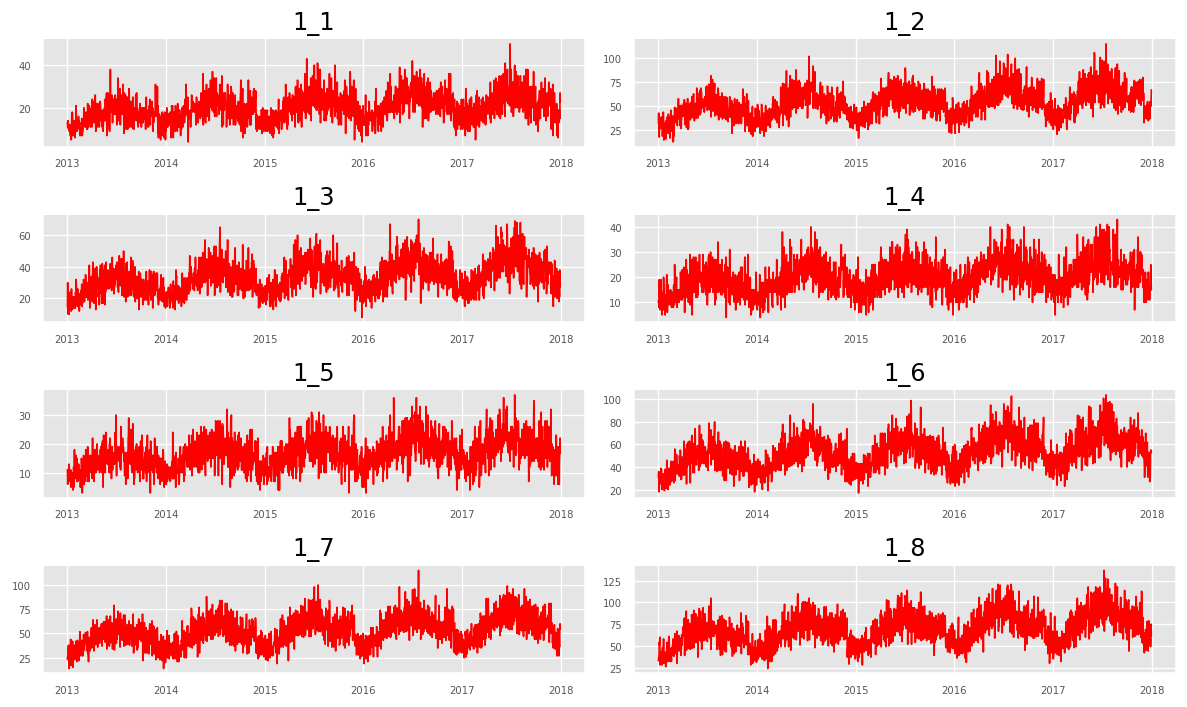

In [37]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

#### Check for Stationarity and Make the Time Series Stationary

### Multivariate Forecast Model
#### Vector Autoregression (VAR)

In [30]:
#split into train and valid sets
train_store_item = store_item.loc['2013-01-01':'2017-09-30']
valid_store_item  = store_item.loc['2017-10-01':'2017-12-31']

In [31]:
train_store_item.shape,valid_store_item.shape

((1734, 500), (92, 500))

In [34]:
var = VAR(train_store_item.values)
results_var = var.fit()